In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-dataset/cars.csv


In [3]:
cars_data = pd.read_csv('/kaggle/input/used-cars-dataset/cars.csv')
print(cars_data.head())
print(cars_data.describe())
print(cars_data.dtypes)

  manufacturer            model  year   mileage  \
0        Acura  ILX Hybrid 1.5L  2013   92945.0   
1        Acura  ILX Hybrid 1.5L  2013   47645.0   
2        Acura  ILX Hybrid 1.5L  2013   53422.0   
3        Acura  ILX Hybrid 1.5L  2013  117598.0   
4        Acura  ILX Hybrid 1.5L  2013  114865.0   

                                              engine   transmission  \
0  1.5L I-4 i-VTEC variable valve control, engine...      Automatic   
1                        1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT   
2                        1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT   
3                        1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT   
4                        1.5L I4 8V MPFI SOHC Hybrid  Automatic CVT   

          drivetrain fuel_type    mpg           exterior_color interior_color  \
0  Front-wheel Drive  Gasoline  39-38                    Black      Parchment   
1  Front-wheel Drive    Hybrid  39-38                     Gray          Ebony   
2  Front-wheel Drive   

In [4]:
print('First-hand analysis of the dataset')
print('The average mileage of cars found in this dataset is: ' + str(round(cars_data['mileage'].mean(),2)))
print('The mean age of cars found in this dataset is: ' + str(round(2023-cars_data['year'].mean(),0)))
print('The average price of cars found in this dataset is: ' + str(round(cars_data['price'].mean(),2)) + ' USD')
print('The average price drop of cars found in this dataset is: ' + str(round(cars_data['price_drop'].mean(),2)) + ' USD')
print(cars_data['mpg'].value_counts(normalize=True, ascending=False, dropna=True))
print('The five most frequent fuel consumption values are within the range of 19-26, 18-25, 17-25, 20-27 and 16-23 mpg.')
print(cars_data['transmission'].value_counts(ascending=False,dropna=True, normalize=True))
manual_transmission = cars_data['transmission'].str.contains('Manual').sum()
print(manual_transmission)
print('Regarding transmission types, 6-Speed Automatic, 8-Speed Automatic, Automatic CVT, Automatic and 9-Speed Automatic are the top five most observed models.')
print(cars_data['fuel_type'].value_counts(ascending=False, normalize=True))
print('Gasoline represents by far (87.2%) the most frequent fuel type in the dataset, followed by hybrids (3.94%), diesel (3.78%), and, 2.19% for electric type')
top5_fuels = [0.897, 0.0394, 0.0378, 0.0219, .0039]
top5_fuels_labels = ['Gasoline+E85', 'Hybrid', 'Diesel', 'Electric','Other']
print(cars_data['manufacturer'].value_counts(normalize=True, ascending=False))
top5_manufacturers = [0.103, 0.0781, 0.0735, 0.0637, 0.0547]
top5_manufacturers_labels = ['Ford', 'Toyota', 'Chevrolet', 'Nissan', 'Jeep']
print('Among manufacturers, Ford lead with a 10.3% marketshare, being closely followed by Toyota (7.81%) and Chevrolet (7.35%).')
print(cars_data['engine'].value_counts(ascending=False))
engine_types = cars_data['engine']
engine_v6 = engine_types.str.contains('V6').sum()
engine_i4 = engine_types.str.contains('I4').sum()
engine_v8 = engine_types.str.contains('V8').sum()
engine_turbo = engine_types.str.contains('Turbo').sum()
engine_labels = ['V6 engine', 'V8 engine', 'I4 engine', 'Turbo engine']
engine_prop = [engine_v6, engine_v8, engine_i4, engine_turbo]
print('The number of cars with V6 engines is: ' + str(engine_v6))
print('The number of cars with I4 engines is: ' + str(engine_i4))
print('The number of cars with V8 engines is: ' + str(engine_v8))
print('The number of turbocharged engines is: ' + str(engine_turbo))


First-hand analysis of the dataset
The average mileage of cars found in this dataset is: 55781.69
The mean age of cars found in this dataset is: 5.0
The average price of cars found in this dataset is: 36488.98 USD
The average price drop of cars found in this dataset is: 1007.47 USD
19-26      0.026144
18-25      0.025404
17-25      0.023070
20-27      0.021848
16-23      0.018530
             ...   
23-31.0    0.000002
29-42      0.000002
46-41      0.000002
47-47.0    0.000002
19-27.5    0.000002
Name: mpg, Length: 865, dtype: float64
The five most frequent fuel consumption values are within the range of 19-26, 18-25, 17-25, 20-27 and 16-23 mpg.
6-Speed Automatic              0.197553
8-Speed Automatic              0.185555
Automatic CVT                  0.144411
Automatic                      0.129121
9-Speed Automatic              0.081348
                                 ...   
Rebuilt 3 Speed Auto           0.000001
4-tomatic 2 Speed Automatic    0.000001
Top Load 4-Speed Manual  

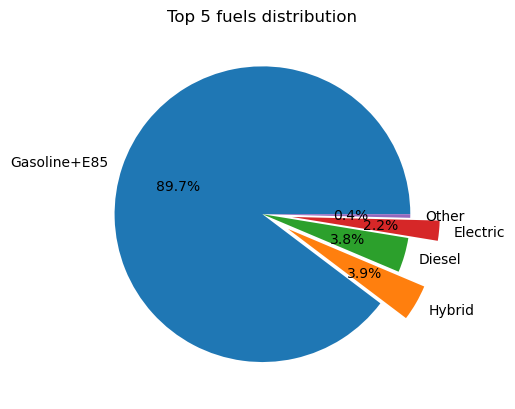

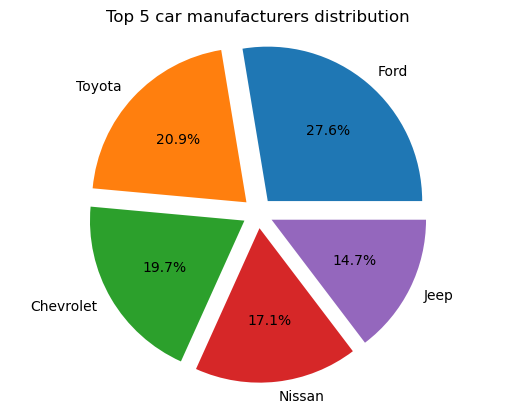

(-1.205258870334451, 1.18078899611847, -1.1855519023966083, 1.2034154835294228)

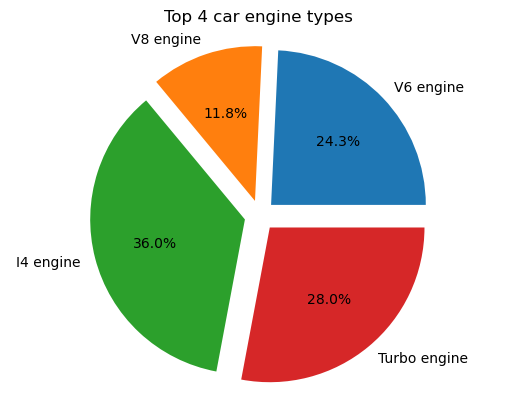

In [5]:
plt.pie(x=top5_fuels, labels=top5_fuels_labels, normalize=True, autopct='%.1f%%',explode=[0,0.2,0,0.2,0])
plt.title('Top 5 fuels distribution')
plt.show()
plt.axis('equal')
plt.clf()
plt.pie(x=top5_manufacturers, labels=top5_manufacturers_labels, normalize=True, autopct='%.1f%%',explode=[0.1,0.1,0.1,0.1,0.1])
plt.title('Top 5 car manufacturers distribution')
plt.axis('equal')
plt.show()
plt.clf()
plt.pie(x=engine_prop, labels=engine_labels, normalize=True, autopct='%.1f%%',explode=[0.1,0.1,0.1,0.1])
plt.title('Top 4 car engine types')
plt.axis('equal')


Front-wheel Drive                                              241432
All-wheel Drive                                                230219
Four-wheel Drive                                               157082
Rear-wheel Drive                                                97437
FWD                                                              6450
AWD                                                              3586
4WD                                                              1923
RWD                                                              1758
All-Wheel Drive                                                   120
Unknown                                                           105
Front-Wheel Drive                                                 104
Front-Wheel Drive with Limited-Slip Differential                   44
Four-Wheel Drive                                                   43
Four-Wheel Drive with Locking and Limited-Slip Differential        42
Rear-Wheel Drive    

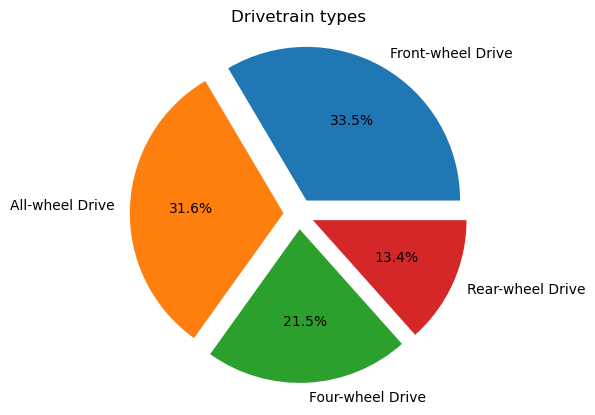

In [6]:
print(cars_data['drivetrain'].value_counts())
fwd_cars = cars_data['drivetrain'].str.contains('Front|FWD').sum()
awd_cars = cars_data['drivetrain'].str.contains('All|AWD').sum()
cars_4wd = cars_data['drivetrain'].str.contains('Four|4WD').sum()
rwd_cars = cars_data['drivetrain'].str.contains('Rear|RWD').sum()
drivetrain_props = [fwd_cars, awd_cars, cars_4wd, rwd_cars]
drivetrain_labels = ['Front-wheel Drive', 'All-wheel Drive', 'Four-wheel Drive', 'Rear-wheel Drive']
plt.pie(drivetrain_props, labels=drivetrain_labels, autopct='%.1f%%', explode=[0.1,0.1,0.1,0.1])
plt.title('Drivetrain types')
plt.axis('equal')
plt.show()

Toyota           12490
Ford              2802
Honda             2516
Lexus             2477
Jeep              1404
BMW               1260
Kia               1161
Hyundai            866
Mercedes-Benz      649
Volvo              631
Chrysler           529
Audi               428
Lincoln            399
Chevrolet          386
Porsche            359
Mitsubishi         191
Acura              126
Land Rover         126
Subaru             107
Buick               99
Nissan              49
INFINITI            37
Volkswagen          23
Cadillac             9
RAM                  9
GMC                  6
Mazda                1
Jaguar               1
Name: manufacturer, dtype: int64


/tmp/ipykernel_33/2651646881.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(hybridtop_manufacturers, rotation=90)


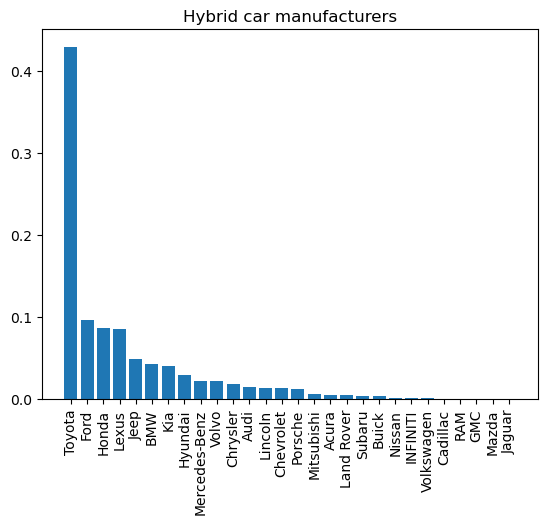

In [7]:
hybrids = cars_data[cars_data['fuel_type']=='Hybrid']
hybrids_manufacturers = hybrids['manufacturer']
hybridtop_manufacturers = ['Toyota', 'Ford', 'Honda', 'Lexus', 'Jeep', 'BMW', 'Kia','Hyundai', 'Mercedes-Benz',
'Volvo', 'Chrysler','Audi', 'Lincoln','Chevrolet','Porsche','Mitsubishi','Acura', 'Land Rover',
'Subaru','Buick','Nissan','INFINITI','Volkswagen','Cadillac','RAM','GMC','Mazda', 'Jaguar']
print(hybrids_manufacturers.value_counts())
ax = plt.subplot()
plt.bar(x=hybridtop_manufacturers, height=hybrids_manufacturers.value_counts(normalize=True))
plt.title('Hybrid car manufacturers')
ax.set_xticklabels(hybridtop_manufacturers, rotation=90)
plt.show()

In [8]:
print(cars_data['one_owner'].value_counts(normalize=True))
print('The majority of cars, 56.2 %, had only one owner.')
print(cars_data['accidents_or_damage'].value_counts(normalize=True))
print('The majority of cars, 77.1 %, did not present accidents or damage.')
print(cars_data['personal_use_only'].value_counts(normalize=True))
print('The majority of cars, 65.7 %, are for personal use.')



1.0    0.561969
0.0    0.438031
Name: one_owner, dtype: float64
The majority of cars, 56.2 %, had only one owner.
0.0    0.771384
1.0    0.228616
Name: accidents_or_damage, dtype: float64
The majority of cars, 77.1 %, did not present accidents or damage.
1.0    0.657212
0.0    0.342788
Name: personal_use_only, dtype: float64
The majority of cars, 65.7 %, are for personal use.


4.7    158860
4.8    156076
4.6    118326
4.5     74962
4.9     64119
4.4     42635
5.0     30988
4.3     28766
4.2     16995
4.1     13242
4.0      6862
3.8      5222
3.9      3795
3.7      2757
3.6      1554
3.4      1400
2.8       886
3.5       832
2.9       730
3.0       357
2.6       325
1.0       270
3.2       163
2.5       107
3.3       100
2.2        41
2.7        30
3.1        23
2.1        14
2.0         9
2.3         5
1.7         4
1.5         2
1.3         1
1.9         1
Name: driver_rating, dtype: int64
3310965.5000000005 3377294.2 3377294.2 283.0


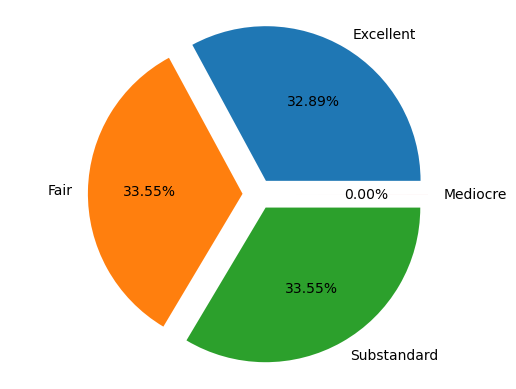

In [19]:
print(cars_data['driver_rating'].value_counts(ascending=False))
excellent_rating = cars_data.loc[cars_data['driver_rating']>=4, 'driver_rating'].sum()
fair_rating = cars_data.loc[(cars_data['driver_rating']<4) | (cars_data['driver_rating']>=3), 'driver_rating'].sum()
substandard_rating = cars_data.loc[(cars_data['driver_rating']<3) | (cars_data['driver_rating']>=2), 'driver_rating'].sum()
mediocre_rating = cars_data.loc[cars_data['driver_rating']<2, 'driver_rating'].sum()
print(excellent_rating,fair_rating, substandard_rating, mediocre_rating)
dr_labels = ['Excellent', 'Fair', 'Substandard', 'Mediocre']
plt.pie([excellent_rating,fair_rating, substandard_rating, mediocre_rating], labels=dr_labels, explode=[0.1,0.1,0.1,0.1], autopct='%.2f%%')
plt.axis('equal')
plt.show()

In [49]:
d_rating = cars_data['driver_rating']
rating_manufacturers = cars_data[['manufacturer','model','year','driver_rating', 'mileage']]
print(rating_manufacturers[(cars_data['driver_rating']==5.0)&(cars_data['year']==2017)].groupby(by=['year'], sort=True).value_counts(ascending=True))


year  manufacturer   model             driver_rating  mileage 
2017  BMW            328d Base         5.0            37716.0     1
      Jaguar         XJ XJL Portfolio  5.0            61345.0     1
                                                      60604.0     1
                                                      60075.0     1
                                                      56805.0     1
                                                                 ..
      Cadillac       CT6 PLUG-IN Base  5.0            58962.0     1
                     ATS-V Base        5.0            93833.0     1
                                                      56744.0     1
      GMC            Savana 2500 2500  5.0            133419.0    1
      Mercedes-Benz  AMG SLC 43 Base   5.0            101671.0    1
Length: 287, dtype: int64


In [13]:
print(cars_data['exterior_color'].value_counts(normalize=True))
print('There are 7681 different exterior color options, among which black (8.0%), white (6.8%), gray (4.0%), silver (3.2%) and blue (2.3%) are the most common.')

Black                         0.079989
White                         0.067846
Gray                          0.040107
Silver                        0.032234
Blue                          0.023167
                                ...   
Garnet Fire                   0.000001
Athens Blue Pearl Metallic    0.000001
Mojave Copper Metallic        0.000001
Beryllium                     0.000001
COL01900                      0.000001
Name: exterior_color, Length: 7681, dtype: float64
There are 7681 different exterior color options, among which black (8.0%), white (6.8%), gray (4.0%), silver (3.2%) and blue (2.3%) are the most common.


In [50]:
price_analysis = cars_data[['manufacturer', 'model', 'year', 'price', 'price_drop']]
print(price_analysis[cars_data['manufacturer']=='Porsche'].groupby(by=['price_drop'], sort=True).value_counts(normalize=True, ascending=False))
print(price_analysis[cars_data['manufacturer']=='Lexus'].groupby(by=['price_drop'], sort=True).value_counts(normalize=True, ascending=False))
print(price_analysis[cars_data['manufacturer']=='BMW'].groupby(by=['price_drop'], sort=True).value_counts(normalize=True, ascending=False))
print(price_analysis[cars_data['manufacturer']=='Mercedes-Benz'].groupby(by=['price_drop'], sort=True).value_counts(normalize=True, ascending=False))
print(price_analysis[cars_data['manufacturer']=='Cadillac'].groupby(by=['price_drop'], sort=True).value_counts(normalize=True, ascending=False))

price_drop  manufacturer  model              year  price   
100.0       Porsche       Macan Base         2020  47642.0     0.013158
                          Panamera 4S        2017  59895.0     0.013158
                          Panamera Base      2017  58501.0     0.013158
                                             2019  77800.0     0.013158
                                                   79931.0     0.013158
                                                                 ...   
50000.0     Porsche       911 Wide Body      1994  249995.0    0.500000
79909.0     Porsche       911 Carrera        2021  119992.0    0.333333
                          911 Carrera 4 GTS  2022  189992.0    0.333333
                          911 Carrera GTS    2022  173992.0    0.333333
90000.0     Porsche       911 Turbo          1991  299800.0    1.000000
Length: 6153, dtype: float64
price_drop  manufacturer  model             year  price  
100.0       Lexus         RX 350 350        2017  28900.0    